In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [2]:
import matplotlib as mpl

In [3]:
import numpy as np
import pandas as pd

In [4]:
ls

Fe.bcc.pw.in.template           Fe_bcc_5.39_11.pw.in            Fe_bcc_5.41_7.pw.in             Fe_bcc_5.43_10.pw.in            Fe_bcc_5.44_13.pw.in            Fe_bcc_5.45_9.pw.in             Fe_bcc_5.4_12.pw.in
Fe.hcp.pw.in.template           Fe_bcc_5.39_12.out              Fe_bcc_5.41_8.out               Fe_bcc_5.43_11.out              Fe_bcc_5.44_7.out               Fe_bcc_5.46_10.out              Fe_bcc_5.4_13.out
Fe.pbe-spn-kjpaw_psl.0.2.1.UPF  Fe_bcc_5.39_12.pw.in            Fe_bcc_5.41_8.pw.in             Fe_bcc_5.43_11.pw.in            Fe_bcc_5.44_7.pw.in             Fe_bcc_5.46_10.pw.in            Fe_bcc_5.4_13.pw.in
Fe_bcc_5.38_10.out              Fe_bcc_5.39_13.out              Fe_bcc_5.41_9.out               Fe_bcc_5.43_12.out              Fe_bcc_5.44_8.out               Fe_bcc_5.46_11.out              Fe_bcc_5.4_7.out
Fe_bcc_5.38_10.pw.in            Fe_bcc_5.39_13.pw.in            Fe_bcc_5.41_9.pw.in             Fe_bcc_5.43_12.pw.in            Fe_bcc_5.44_8.pw.in          

In [5]:
datafile2 = pd.read_csv('results.csv')

In [6]:
datafile2.head(10)

,filename,ecut,nkpts,alat,energy,total_force,cpu_time
0,Fe_bcc_5.38_7.out,50,40,5.38,-329.263384,0,19.7
1,Fe_bcc_5.38_8.out,50,58,5.38,-329.262011,0,30.0
2,Fe_bcc_5.38_9.out,50,70,5.38,-329.262817,0,36.9
3,Fe_bcc_5.38_10.out,50,94,5.38,-329.263102,0,37.1
4,Fe_bcc_5.38_11.out,50,112,5.38,-329.262501,0,34.8
5,Fe_bcc_5.38_12.out,50,144,5.38,-329.262704,0,51.4
6,Fe_bcc_5.38_13.out,50,168,5.38,-329.262782,0,56.2
7,Fe_bcc_5.39_7.out,50,40,5.39,-329.263356,0,20.1
8,Fe_bcc_5.39_8.out,50,58,5.39,-329.261880,0,30.4
9,Fe_bcc_5.39_9.out,50,70,5.39,-329.262751,0,36.7


In [8]:
gb= datafile2.groupby('alat')

In [9]:
gb.groups

{5.3799999999999999: [0, 1, 2, 3, 4, 5, 6],
 5.3899999999999997: [7, 8, 9, 10, 11, 12, 13],
 5.4000000000000004: [14, 15, 16, 17, 18, 19, 20],
 5.4100000000000001: [21, 22, 23, 24, 25, 26, 27],
 5.4199999999999999: [28, 29, 30, 31, 32, 33, 34],
 5.4299999999999997: [35, 36, 37, 38, 39, 40, 41],
 5.4400000000000004: [42, 43, 44, 45, 46, 47, 48],
 5.4500000000000002: [49, 50, 51, 52, 53, 54, 55],
 5.46: [56, 57, 58, 59, 60, 61, 62]}

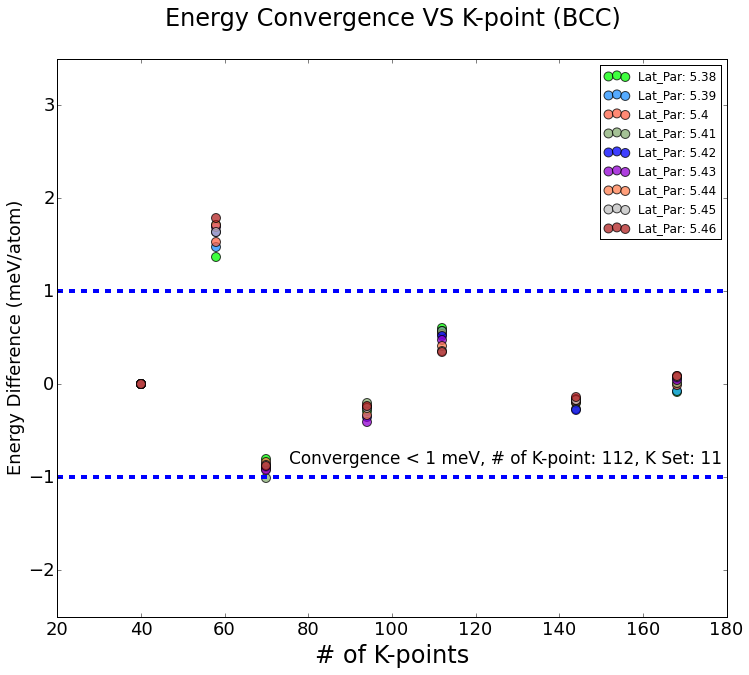

In [15]:
#Set the default color cycle
# mpl.rcParams['axes.color_cycle'] = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral']
color_cycle = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral','silver','firebrick','moccasin','darkorange']

fig, ax0 =plt.subplots(nrows=1)
fig.set_size_inches(12,10)

ax0.set_title(r'Energy Convergence VS K-point (BCC)',fontsize=24, y=1.05)
ax0.set_ylabel('Energy Difference (meV/atom)',fontsize=18)
ax0.tick_params(labelsize = 18)
ax0.set_xlabel('# of K-points',fontsize=24)
# ax0.set_yscale('log')
color_index = 0
ax0.set_ylim(-2.5,3.5)

for k, gp in gb:
    df = gb.get_group(k)
    diff_data = (df.set_index('filename').diff()).replace('NaN',0)
    nkpts = df['nkpts'].tolist()
    converge_energy = 1000*diff_data['energy']
    converge_energy = converge_energy.tolist()
    ax0.scatter(nkpts,converge_energy,marker='o',alpha=0.75,s=80,label='Lat_Par: %s'%k, c=color_cycle[color_index])
    color_index+=1

ax0.legend(loc=1)
l = plt.axhline(y=1,linestyle='dashed',linewidth=4, c='b')
l = plt.axhline(y=-1,linestyle='dashed',linewidth=4, c='b')
ax0.annotate('Convergence < 1 meV, # of K-point: 112, K Set: 11', xy=(40, 1),  xycoords='data',
                xytext=(0.99, 0.3), textcoords='axes fraction',
                horizontalalignment='right', verticalalignment='top',fontsize=17
                )

plt.subplots_adjust(hspace=0.5)
plt.show()

key=5.38
key=5.39
key=5.4
key=5.41
key=5.42
key=5.43
key=5.44
key=5.45
key=5.46


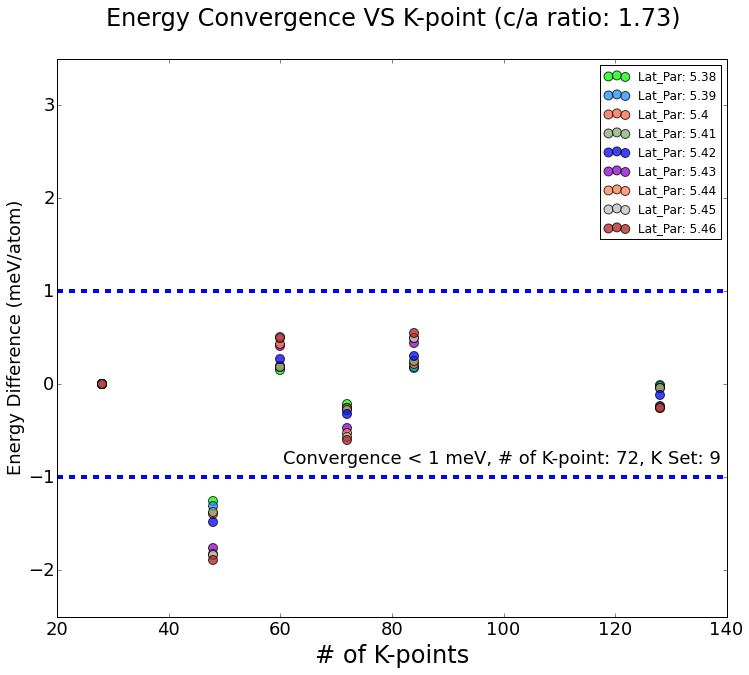

In [72]:
#Set the default color cycle
# mpl.rcParams['axes.color_cycle'] = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral']
color_cycle = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral','silver','firebrick','moccasin','darkorange']

fig, ax0 =plt.subplots(nrows=1)
fig.set_size_inches(12,10)

ax0.set_title(r'Energy Convergence VS K-point (c/a ratio: 1.73)',fontsize=24, y=1.05)
ax0.set_ylabel('Energy Difference (meV/atom)',fontsize=18)
ax0.tick_params(labelsize = 18)
ax0.set_xlabel('# of K-points',fontsize=24)
# ax0.set_yscale('log')
color_index = 0
ax0.set_ylim(-2.5,3.5)

for k, gp in gb_173:
    print 'key=' +str(k)
    df = gb_173.get_group(k)
    diff_data = (df.set_index('filename').diff()).replace('NaN',0)
#     print 1000*diff_data['energy per atom ']
#     df['energy_converge (meV)'] = 1000*diff_data['energy per atom ']
    nkpts = df['nkpts'].tolist()
    converge_energy = 1000*diff_data['energy per atom ']
    converge_energy = converge_energy.tolist()
    ax0.scatter(nkpts,converge_energy,marker='o',alpha=0.75,s=80,label='Lat_Par: %s'%k, c=color_cycle[color_index])
    color_index+=1

ax0.legend(loc=1)
l = plt.axhline(y=1,linestyle='dashed',linewidth=4, c='b')
l = plt.axhline(y=-1,linestyle='dashed',linewidth=4, c='b')
ax0.annotate('Convergence < 1 meV, # of K-point: 72, K Set: 9', xy=(40, 1),  xycoords='data',
                xytext=(0.99, 0.3), textcoords='axes fraction',
                horizontalalignment='right', verticalalignment='top',fontsize=18
                )

plt.subplots_adjust(hspace=0.5)
plt.show()

key=5.38
key=5.39
key=5.4
key=5.41
key=5.42
key=5.43
key=5.44
key=5.45
key=5.46


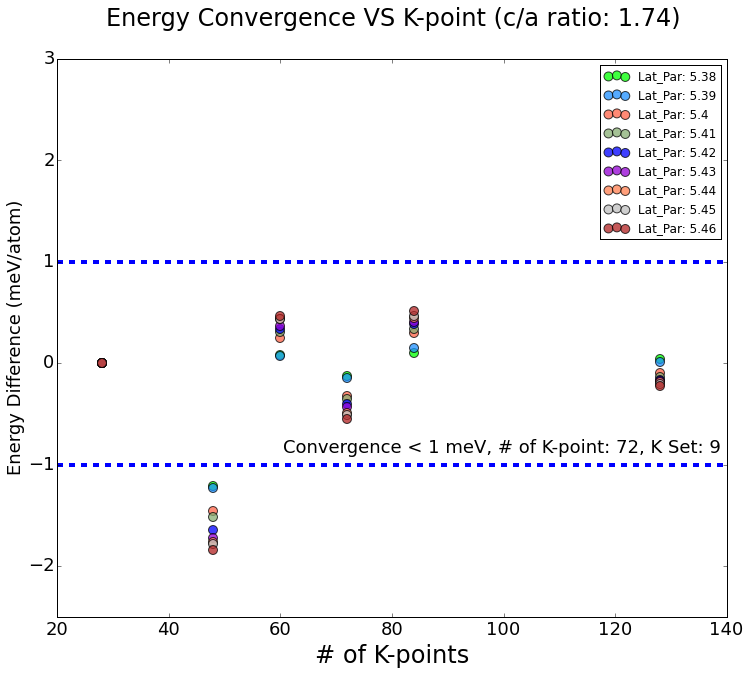

In [73]:
#Set the default color cycle
# mpl.rcParams['axes.color_cycle'] = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral']
color_cycle = ['lime','dodgerblue','tomato','sage','blue','darkviolet','coral','silver','firebrick','moccasin','darkorange']

fig, ax0 =plt.subplots(nrows=1)
fig.set_size_inches(12,10)

ax0.set_title(r'Energy Convergence VS K-point (c/a ratio: 1.74)',fontsize=24, y=1.05)
ax0.set_ylabel('Energy Difference (meV/atom)',fontsize=18)
ax0.tick_params(labelsize = 18)
ax0.set_xlabel('# of K-points',fontsize=24)
# ax0.set_yscale('log')
color_index = 0
ax0.set_ylim(-2.5,3)

for k, gp in gb_174:
    print 'key=' +str(k)
    df = gb_174.get_group(k)
    diff_data = (df.set_index('filename').diff()).replace('NaN',0)
#     print 1000*diff_data['energy per atom ']
#     df['energy_converge (meV)'] = 1000*diff_data['energy per atom ']
    nkpts = df['nkpts'].tolist()
    converge_energy = 1000*diff_data['energy per atom ']
    converge_energy = converge_energy.tolist()
    ax0.scatter(nkpts,converge_energy,marker='o',alpha=0.75,s=80,label='Lat_Par: %s'%k, c=color_cycle[color_index])
    color_index+=1

ax0.legend(loc=1)
l = plt.axhline(y=1,linestyle='dashed',linewidth=4, c='b')
l = plt.axhline(y=-1,linestyle='dashed',linewidth=4, c='b')
ax0.annotate('Convergence < 1 meV, # of K-point: 72, K Set: 9', xy=(40, 1),  xycoords='data',
                xytext=(0.99, 0.32), textcoords='axes fraction',
                horizontalalignment='right', verticalalignment='top',fontsize=18
                )

plt.subplots_adjust(hspace=0.5)
plt.show()

In [30]:
df =gb.get_group(5.46)

In [34]:
df['energy'].min()

-329.26187959999999

In [14]:
grouped.first()

,filename,ecut,nkpts,energy,total_force,cpu_time
alat,,,,,,
5.38,Fe_bcc_5.38_7.out,50,40,-329.263384,0,19.7
5.39,Fe_bcc_5.39_7.out,50,40,-329.263356,0,20.1
5.40,Fe_bcc_5.4_7.out,50,40,-329.263334,0,18.9
5.41,Fe_bcc_5.41_7.out,50,40,-329.263275,0,17.3
5.42,Fe_bcc_5.42_7.out,50,40,-329.262761,0,17.7
5.43,Fe_bcc_5.43_7.out,50,40,-329.262549,0,19.1
5.44,Fe_bcc_5.44_7.out,50,40,-329.262409,0,24.6
5.45,Fe_bcc_5.45_7.out,50,40,-329.262031,0,21.9
5.46,Fe_bcc_5.46_7.out,50,40,-329.261880,0,22.2


In [7]:
datafile.head(10)

,filename(1026),ecut(1026),nkpts(1026),alat(1026),energy(1026),filename(1030),ecut(1030),nkpts(1030),alat(1030),energy(1030),energy_difference (meV/atom)
0,Si_10_5_10.26.out,10,10,10.26,-93.443092,Si_10_5_10.3.out,10,10,10.3,-93.437631,-37.148030
1,Si_10_6_10.26.out,10,16,10.26,-93.445716,Si_10_6_10.3.out,10,16,10.3,-93.440330,-36.638769
2,Si_10_7_10.26.out,10,20,10.26,-93.447019,Si_10_7_10.3.out,10,20,10.3,-93.441816,-35.389563
3,Si_10_8_10.26.out,10,29,10.26,-93.447441,Si_10_8_10.3.out,10,29,10.3,-93.442182,-35.770454
4,Si_10_9_10.26.out,10,35,10.26,-93.447557,Si_10_9_10.3.out,10,35,10.3,-93.442162,-36.703396
5,Si_10_10_10.26.out,10,47,10.26,-93.447692,Si_10_10_10.3.out,10,47,10.3,-93.442302,-36.669042
6,Si_20_5_10.26.out,20,10,10.26,-93.447850,Si_20_5_10.3.out,20,10,10.3,-93.448221,2.525353
7,Si_20_6_10.26.out,20,16,10.26,-93.450785,Si_20_6_10.3.out,20,16,10.3,-93.451192,2.763860
8,Si_20_7_10.26.out,20,20,10.26,-93.451882,Si_20_7_10.3.out,20,20,10.3,-93.452218,2.288001
9,Si_20_8_10.26.out,20,29,10.26,-93.452291,Si_20_8_10.3.out,20,29,10.3,-93.452645,2.413310


In [8]:
x = list(set(datafile['nkpts(1026)'].tolist()))
x

[35, 10, 47, 16, 20, 29]

In [9]:
datafile10 =datafile[(datafile['ecut(1026)']==10)]
datafile20 =datafile[(datafile['ecut(1026)']==20)]
datafile30 =datafile[(datafile['ecut(1026)']==30)]
datafile40 =datafile[(datafile['ecut(1026)']==40)]
datafile50 =datafile[(datafile['ecut(1026)']==50)]
datafile60 =datafile[(datafile['ecut(1026)']==60)]
datafile70 =datafile[(datafile['ecut(1026)']==70)]
datafile80 =datafile[(datafile['ecut(1026)']==80)]
datafile90 =datafile[(datafile['ecut(1026)']==90)]
datafile100 =datafile[(datafile['ecut(1026)']==100)]

In [10]:
datakpt10 = datafile2[(datafile2['nkpts(1026)']==10)]
datakpt16 = datafile2[(datafile2['nkpts(1026)']==16)]
datakpt20 = datafile2[(datafile2['nkpts(1026)']==20)]
datakpt29 = datafile2[(datafile2['nkpts(1026)']==29)]
datakpt35 = datafile2[(datafile2['nkpts(1026)']==35)]
datakpt47 = datafile2[(datafile2['nkpts(1026)']==47)]

In [11]:
x_cut_10 =datakpt10['ecut(1026)'].tolist()
y_cut_conver_10 = datakpt10['energy_difference (meV/atom)'].tolist()
x_cut_16 =datakpt16['ecut(1026)'].tolist()
y_cut_conver_16 = datakpt16['energy_difference (meV/atom)'].tolist()
x_cut_20 =datakpt20['ecut(1026)'].tolist()
y_cut_conver_20 = datakpt20['energy_difference (meV/atom)'].tolist()
x_cut_29 =datakpt29['ecut(1026)'].tolist()
y_cut_conver_29 = datakpt29['energy_difference (meV/atom)'].tolist()
x_cut_35 =datakpt35['ecut(1026)'].tolist()
y_cut_conver_35 = datakpt35['energy_difference (meV/atom)'].tolist()
x_cut_47 =datakpt47['ecut(1026)'].tolist()
y_cut_conver_47 = datakpt47['energy_difference (meV/atom)'].tolist()

In [12]:
datafile10

,filename(1026),ecut(1026),nkpts(1026),alat(1026),energy(1026),filename(1030),ecut(1030),nkpts(1030),alat(1030),energy(1030),energy_difference (meV/atom)
0,Si_10_5_10.26.out,10,10,10.26,-93.443092,Si_10_5_10.3.out,10,10,10.3,-93.437631,-37.148030
1,Si_10_6_10.26.out,10,16,10.26,-93.445716,Si_10_6_10.3.out,10,16,10.3,-93.440330,-36.638769
2,Si_10_7_10.26.out,10,20,10.26,-93.447019,Si_10_7_10.3.out,10,20,10.3,-93.441816,-35.389563
3,Si_10_8_10.26.out,10,29,10.26,-93.447441,Si_10_8_10.3.out,10,29,10.3,-93.442182,-35.770454
4,Si_10_9_10.26.out,10,35,10.26,-93.447557,Si_10_9_10.3.out,10,35,10.3,-93.442162,-36.703396
5,Si_10_10_10.26.out,10,47,10.26,-93.447692,Si_10_10_10.3.out,10,47,10.3,-93.442302,-36.669042


In [13]:
x_nkpts_10 = datafile10['nkpts(1026)'].tolist()
y_conver_10 = datafile10['energy_difference (meV/atom)'].tolist()
x_nkpts_20 = datafile20['nkpts(1026)'].tolist()
y_conver_20 = datafile20['energy_difference (meV/atom)'].tolist()
x_nkpts_30 = datafile30['nkpts(1026)'].tolist()
y_conver_30 = datafile30['energy_difference (meV/atom)'].tolist()
x_nkpts_40 = datafile40['nkpts(1026)'].tolist()
y_conver_40 = datafile40['energy_difference (meV/atom)'].tolist()
x_nkpts_50 = datafile50['nkpts(1026)'].tolist()
y_conver_50 = datafile50['energy_difference (meV/atom)'].tolist()
x_nkpts_60 = datafile60['nkpts(1026)'].tolist()
y_conver_60 = datafile60['energy_difference (meV/atom)'].tolist()
x_nkpts_70 = datafile70['nkpts(1026)'].tolist()
y_conver_70 = datafile70['energy_difference (meV/atom)'].tolist()
x_nkpts_80 = datafile80['nkpts(1026)'].tolist()
y_conver_80 = datafile80['energy_difference (meV/atom)'].tolist()
x_nkpts_90 = datafile90['nkpts(1026)'].tolist()
y_conver_90 = datafile90['energy_difference (meV/atom)'].tolist()
x_nkpts_100 = datafile100['nkpts(1026)'].tolist()
y_conver_100 = datafile100['energy_difference (meV/atom)'].tolist()

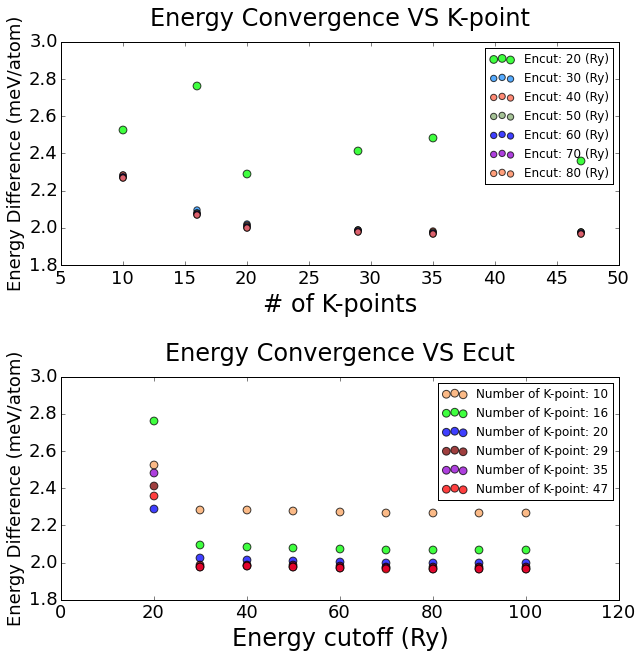

In [15]:
fig, (ax0,ax1)=plt.subplots(nrows=2)
fig.set_size_inches(10,10)

ax0.set_title('Energy Convergence VS K-point',fontsize=24, y=1.05)
ax0.set_ylabel('Energy Difference (meV/atom)',fontsize=18)
ax0.tick_params(labelsize = 18)
ax0.set_xlabel('# of K-points',fontsize=24)
# ax0.set_yscale('log')


#plot ecut 10 data
# ax0.scatter(x_nkpts_10,y_conver_10,marker='o',alpha=0.75,s=60,c='sandybrown',label='Encut: 10 (Ry)')
# ax0.plot(x_nkpts_10,y_conver_10,c='black')

#plot ecut 20 data
ax0.scatter(x_nkpts_20,y_conver_20,marker='o',alpha=0.75,s=60,c='lime',label='Encut: 20 (Ry)')
# ax0.plot(x_nkpts_20,y_conver_20,c='black')

#plot ecut 30 data
ax0.scatter(x_nkpts_30,y_conver_30,marker='o',alpha=0.75,s=40,c='dodgerblue',label='Encut: 30 (Ry)')
# ax0.plot(x_nkpts_30,y_conver_30,c='black')

#plot ecut 40 data
ax0.scatter(x_nkpts_40,y_conver_40,marker='o',alpha=0.75,s=40,c='tomato',label='Encut: 40 (Ry)')
# ax0.plot(x_nkpts_40,y_conver_40,c='black')

#plot ecut 50 data
ax0.scatter(x_nkpts_50,y_conver_50,marker='o',alpha=0.75,s=40,c='sage',label='Encut: 50 (Ry)')
# ax0.plot(x_nkpts_50,y_conver_50,c='black')

#plot ecut 60 data
ax0.scatter(x_nkpts_60,y_conver_60,marker='o',alpha=0.75,s=40,c='blue',label='Encut: 60 (Ry)')
# ax0.plot(x_nkpts_60,y_conver_60,c='black')

#plot ecut 70 data
ax0.scatter(x_nkpts_70,y_conver_70,marker='o',alpha=0.75,s=40,c='darkviolet',label='Encut: 70 (Ry)')
# ax0.plot(x_nkpts_70,y_conver_70,c='black')

#plot ecut 80 data
ax0.scatter(x_nkpts_80,y_conver_80,marker='o',alpha=0.75,s=40,c='coral',label='Encut: 80 (Ry)')
# ax0.plot(x_nkpts_80,y_conver_80,c='black')

ax0.legend(loc='best')


ax1.set_title('Energy Convergence VS Ecut',fontsize=24, y=1.05)
ax1.set_ylabel('Energy Difference (meV/atom)',fontsize=18)
ax1.tick_params(labelsize = 18)
ax1.set_xlabel('Energy cutoff (Ry)',fontsize=24)

#plot kpts 10 data
ax1.scatter(x_cut_10,y_cut_conver_10,marker='o',alpha=0.75,s=60,c='sandybrown',label='Number of K-point: 10')
# ax1.plot(x_cut_10,y_cut_conver_10,c='black')

#plot kpts 16 data
ax1.scatter(x_cut_16,y_cut_conver_16,marker='o',alpha=0.75,s=60,c='lime',label='Number of K-point: 16')
# ax1.plot(x_cut_16,y_cut_conver_16,c='black')

#plot kpts 20 data
ax1.scatter(x_cut_20,y_cut_conver_20,marker='o',alpha=0.75,s=60,c='blue',label='Number of K-point: 20')
# ax1.plot(x_cut_20,y_cut_conver_20,c='black')

#plot kpts 29 data
ax1.scatter(x_cut_29,y_cut_conver_29,marker='o',alpha=0.75,s=60,c='maroon',label='Number of K-point: 29')
# ax1.plot(x_cut_29,y_cut_conver_29,c='black')

#plot kpts 35 data
ax1.scatter(x_cut_35,y_cut_conver_35,marker='o',alpha=0.75,s=60,c='darkviolet',label='Number of K-point: 35')
# ax1.plot(x_cut_35,y_cut_conver_35,c='black')

#plot kpts 47 data
ax1.scatter(x_cut_47,y_cut_conver_47,marker='o',alpha=0.75,s=60,c='red',label='Number of K-point: 47')
# ax1.plot(x_cut_10,y_cut_conver_47,c='black')

ax1.legend(loc='best')
ax1.set_ylim(1.8,3)

plt.subplots_adjust(hspace=0.5)
plt.show()

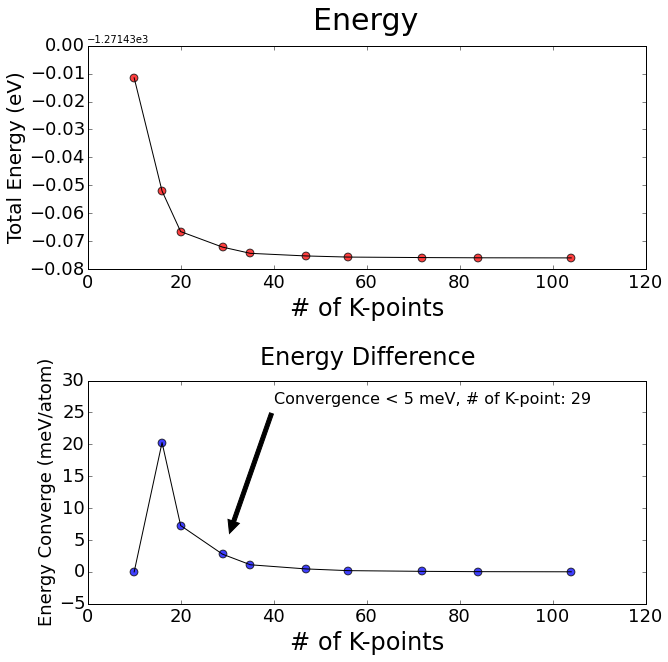

In [13]:
fig, (ax0,ax1)=plt.subplots(nrows=2)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy',fontsize=30,y=1.05)
ax0.set_xlabel('# of K-points',fontsize=24)
ax0.set_ylabel('Total Energy (eV)',fontsize=20)
ax0.set_ylim( -1271.51,-1271.43)
ax0.tick_params(labelsize = 18)

ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
ax1.plot(x,y_conver,c='black')
ax1.set_title('Energy Difference',fontsize=24,y=1.05)
ax1.set_xlabel('# of K-points',fontsize=24)
ax1.set_ylabel('Energy Converge (meV/atom)',fontsize=18)
# ax1.set_yscale('log')
ax1.set_ylim(-5,30)
ax1.annotate('Convergence < 5 meV, # of K-point: 29 ', xy=(30, 5),  xycoords='data',
                xytext=(0.9, 0.95), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top',fontsize=16
                )
ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()